In [1]:
import json
import pandas as pd
import h5py
import numpy as np
import tensorflow as tf
import keras
from keras.layers import Input, Dense, Dropout, LSTM, Flatten, GRU,TimeDistributed
from keras.models import Model, Sequential
from keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split
import os
import h5py
import matplotlib.pyplot as plt
from keras import regularizers
from tensorflow.keras.regularizers import l1
import ast
from tqdm import tqdm

In [186]:
df = pd.read_json('dataset1g.json', lines=True
                 )

In [2]:
df = pd.read_hdf('data_500k_with_tv')

In [107]:
length = len(df)
featuresnum = 16

In [108]:
df

,jet_pt,jet_eta,track_2_d0_significance,track_3_d0_significance,track_2_z0_significance,track_3_z0_significance,n_tracks_over_d0_threshold,jet_prob,jet_width_eta,jet_width_phi,vertex_significance,n_secondary_vertices,n_secondary_vertex_tracks,delta_r_vertex,vertex_mass,vertex_energy_fraction,Light_Jet,Charm_Jet,Bottom_Jet,17
0,32.2340,-0.643775,10.700800,3.150200,0.954538,2.443190,3.0,4.913230e-06,0.067985,0.048788,84.13960,1.0,3.0,0.060169,1.687200,0.999864,0,0,1,"[{{-0.215808, -0.116363, -0.00300674, 0.01526..."
1,27.1675,-1.765690,34.596800,30.913200,0.163268,27.323300,3.0,2.576370e-16,0.078479,0.105953,232.56700,1.0,2.0,0.100039,0.302106,0.097107,0,0,1,"[{{0.865832, -0.0154666, -0.0470188, 0.004403..."
2,76.5242,-0.865873,2.304720,4.925830,3.178780,2.789300,3.0,8.453530e-06,0.050667,0.073102,64.10110,1.0,3.0,0.041544,1.089930,0.646448,0,0,1,"[{{-0.0305462, 0.276271, 0.0221988, -0.021539..."
3,65.7796,-0.596838,6.958120,2.081550,2.777960,0.413344,3.0,5.666940e-08,0.119558,0.086531,30.68700,1.0,2.0,0.074565,0.806820,0.290825,0,0,1,"[{{-0.0536946, -0.0232979, -0.172776, -0.1518..."
4,24.2995,0.184280,14.144600,4.954620,0.668378,0.117590,4.0,1.145500e-09,0.135787,0.086738,141.32700,2.0,8.0,0.045288,2.312110,1.714390,0,0,1,"[{{-0.238139, -0.498327, -0.0209764, -0.16195..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458715,38.2624,1.076520,4.280160,0.837287,1.030040,1.354330,2.0,3.595560e-04,0.096017,0.102977,5.67967,1.0,2.0,0.021131,1.881380,0.754975,0,1,0,"[{{-0.00085676, -0.00729374, -0.126886, -0.04..."
458716,26.9991,-1.842880,0.873438,0.951756,1.867080,0.165320,0.0,9.324860e-03,0.139642,0.188941,26.00780,1.0,2.0,4.624330,0.797176,0.463599,0,1,0,"[{{-0.0360209, -0.0608207, 0.0194916, -0.0191..."
458717,27.5957,-0.618959,2.081820,0.852374,1.934650,2.691350,2.0,5.753440e-04,0.072008,0.071996,27.30100,1.0,3.0,0.107310,1.161160,0.941296,0,1,0,"[{{0.0252132, 0.0875218, -0.176529, -0.070535..."
458718,26.2631,-0.230878,0.906961,0.506578,0.917184,2.258050,1.0,4.674780e-03,0.100409,0.050210,15.02400,1.0,2.0,0.108452,0.601236,0.642732,0,1,0,"[{{-0.044976, -0.432072, -0.0443296, -0.01766..."


In [109]:
x= df.values

In [110]:
features = np.zeros([length,15,7])
features.shape

(458720, 15, 7)

In [111]:
x[:,19][4]

' [{{-0.238139, -0.498327, -0.0209764, -0.161954, -0.88403}, {0.00245914, 0.000703694, 0.221921, -2.12598e-05, -2.02462e-06, 2.41633e-07, 5.32674e-08, 6.27775e-05, 1.26572e-10, 2.16615e-08, -1.77058e-05, -6.38033e-06, 2.6567e-07, 8.25612e-11, 1.02578e-06}, {0.544096}, {0.912458, 5.82981, 0.0244748, 0.022965, 3.6763, 3, 0.714402}}, {{0.0649684, -1.27432, 0.0360563, -0.215375, -0.481842}, {0.00162689, 0.00040755, 0.059443, -1.32943e-05, -1.4335e-06, 1.51507e-07, 9.47797e-09, 2.62948e-05, -2.75185e-10, 1.65398e-08, -5.39323e-06, -3.86385e-06, 9.45593e-08, -1.65978e-09, 4.5614e-07}, {0.55387}, {0.912458, 5.82981, 0.0244748, 0.022965, 3.6763, 3, 0.714402}}, {{0.245698, -0.0553948, 0.0477924, 0.0464971, 0.320049}, {0.00245914, 0.000703694, 0.221921, -2.12598e-05, -2.02462e-06, 2.41633e-07, 5.32674e-08, 6.27775e-05, 1.26572e-10, 2.16615e-08, -1.77058e-05, -6.38033e-06, 2.6567e-07, 8.25612e-11, 1.02578e-06}, {0.100206}, {0.912458, 5.82981, 0.0244748, 0.022965, 3.6763, 3, 0.714402}}, {{0.701427

In [112]:
num = 0
exceptions = 0
for z in tqdm(x):
    try:
        k = z[19]
        k = k.replace(' ', '')
        k = k.replace('{','[')
        k = k.replace('}',']')
        k = k.replace('nan', '0')
        k = k.replace('inf', '0')
        k = k.replace('-inf', '0')
        k = k.replace('-1','0')
        k = np.array(ast.literal_eval(k))
        num1 = 0
        for p in k:
            num4 = 0
            for g in np.array(p[3]):
                features[num][num1][num4] = g
                num4 = num4 + 1
            num1 = num1 + 1
    except:
        exceptions = exceptions + 1
        pass
    num = num + 1

  0%|          | 0/458720 [00:00<?, ?it/s]/home/anrunw/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  del sys.path[0]
100%|██████████| 458720/458720 [03:58<00:00, 1920.28it/s]


In [93]:
exceptions

502

In [94]:
features

array([[[ 1.68720e+00,  5.27322e+00, -3.77642e-02, ...,  8.41396e+00,
          3.00000e+00,  9.99864e-01],
        [ 1.68720e+00,  5.27322e+00, -3.77642e-02, ...,  8.41396e+00,
          3.00000e+00,  9.99864e-01],
        [ 1.68720e+00,  5.27322e+00, -3.77642e-02, ...,  8.41396e+00,
          3.00000e+00,  9.99864e-01],
        ...,
        [ 0.00000e+00,  0.00000e+00,  0.00000e+00, ...,  0.00000e+00,
          0.00000e+00,  0.00000e+00],
        [ 0.00000e+00,  0.00000e+00,  0.00000e+00, ...,  0.00000e+00,
          0.00000e+00,  0.00000e+00],
        [ 0.00000e+00,  0.00000e+00,  0.00000e+00, ...,  0.00000e+00,
          0.00000e+00,  0.00000e+00]],

       [[ 3.02106e-01,  4.77333e+01, -1.23081e-02, ...,  2.32567e+01,
          2.00000e+00,  9.71070e-02],
        [ 3.02106e-01,  4.77333e+01, -1.23081e-02, ...,  2.32567e+01,
          2.00000e+00,  9.71070e-02],
        [ 0.00000e+00,  0.00000e+00,  0.00000e+00, ...,  0.00000e+00,
          0.00000e+00,  0.00000e+00],
        ...,


In [121]:
labels = x[:,16:19]

In [12]:
lab

NameError: name 'lab' is not defined

In [113]:
lab = np.zeros((length,3))

In [114]:
x[:,16]

array([0, 0, 0, ..., 0, 0, 0], dtype=object)

In [119]:
x[:,16:19]

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]], dtype=object)

In [120]:
labels

['light', 'charm', 'bottom']

In [122]:
num = 0
for g in labels:
    if g[0] == 1:
        lab[num][0] = 1
    if g[1] ==1:
        lab[num][1] = 1
    if g[2] == 1:
        lab[num][2] = 1
    num = num + 1

In [123]:
lab

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [187]:
feature = df.values[:,0:16]

In [50]:
lab.shape

(458720, 3)

In [188]:
len(features)

667676

In [189]:
labels = df.values[:,16:19]

In [190]:
labels

array([], shape=(667676, 0), dtype=object)

In [4]:
df.columns = ['j_pt', 'j_eta', 'flavor', 'high_level_track','high_level_vertex','track_variables']

In [5]:
df

,j_pt,j_eta,flavor,high_level_track,high_level_vertex,track_variables
0,47.8712,1.893250,5,"[21.1765, 8.36586, 29.0269, 4.149, 5, 2.68624e...","[32.8902, 3, 7, 0.16244799999999998, 1.59408, ...","[[[0.031162699999999998, 0.0820037, 0.0714865,..."
1,34.9703,0.609755,5,"[5.0077, 3.03583, 2.00754, 0.32992099999999996...","[25.1935, 1, 3, 0.122343, 2.23962, 0.930326999...","[[[-0.029083699999999997, 0.12274499999999999,..."
2,26.5706,-0.530268,5,"[0.8078839999999999, 0.6305649999999999, 1.044...","[-1, -1, -1, inf, -1, -inf]","[[[-0.00689455, -0.379085, 0.0617111, -0.02322..."
3,36.9246,-2.074420,5,"[16.5617, 10.357, 17.5166, 30.4992, 4, 4.35319...","[73.6335, 1, 2, 0.259107, 0.755648, 0.594634]","[[[0.0183914, -0.00212568, -0.0371646999999999..."
4,28.9667,1.512090,5,"[18.0325, 16.1445, 3.29359, 9.00347, 4, 3.3143...","[293.79, 1, 4, 0.0871323, 1.40008, 1.00014]","[[[-0.753196, 3.5972, -0.11093000000000001, 0...."
...,...,...,...,...,...,...
667671,28.8683,-0.312828,5,"[7.22128, 5.02819, 1.33508, 0.4870379999999999...","[142.267, 4, 20, 0.12436599999999999, 6.03091,...","[[[-0.0523197, -0.051427999999999995, -0.02641..."
667672,23.8712,2.193050,5,"[1.4489, 0.269057, 0.24026499999999998, 0.4137...","[-1, -1, -1, inf, -1, -inf]","[[[-0.0316513, 0.041958999999999996, -0.193747..."
667673,43.9947,-0.429437,5,"[4.35949, 3.64555, 0.08826089999999999, 0.2512...","[51.8172, 1, 4, 0.0434366, 2.29199, 0.491515]","[[[-0.0359399, 0.24181599999999998, 0.0285095,..."
667674,37.1874,0.970254,5,"[7.5622, 6.74474, 2.6422, 2.88542, 7, 6.125460...","[114.908, 2, 8, 0.0955868, 4.02645, 1.24965]","[[[-0.505095, 1.25556, -0.147367, 0.0593178, -..."


In [5]:
length = len(df)
featuresnum = 16

In [5]:
features = np.zeros([length,featuresnum])

In [8]:
z = df.values

In [9]:
z[:,0].shape

(667676,)

In [192]:
labmatrix = np.zeros([length,1])

Makes a label matrix

In [201]:
num = 0
for e in z:
    labmatrix[num] = e[2]
    num = num+1

TypeError: 'float' object is not subscriptable

In [202]:
labmatrix

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

one-hot encodes labels

In [203]:
lab = np.zeros([length,3])
num = 0
for x in labmatrix:
    if x == 0:
        lab[num][0]= 1
    elif x == 4:
        lab[num][1] = 1
    else:
        lab[num][2] = 1
    num = num + 1

In [204]:
lab

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

Appends all Pt values into matrix

In [15]:
num = 0
for e in z:
    features[num][0] = e[0]
    num = num+1

In [16]:
features

array([[47.8712,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [34.9703,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [26.5706,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       ...,
       [43.9947,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [37.1874,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [23.5527,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ]])

Appends eta values into matrix

In [17]:
num = 0 
for e in z:
    features[num][1] = e[1]
    num = num+1

In [18]:
features

array([[47.8712  ,  1.89325 ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [34.9703  ,  0.609755,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [26.5706  , -0.530268,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       ...,
       [43.9947  , -0.429437,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [37.1874  ,  0.970254,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [23.5527  ,  1.98701 ,  0.      , ...,  0.      ,  0.      ,
         0.      ]])

Appends all high level tracking variables

In [19]:
num = 0

for e in z:
    num2 = 2
    for var in e[3]:
        features[num][num2] = var
        num2 = num2+1
    num = num+1

In [20]:
features[2]

array([26.5706   , -0.530268 ,  0.807884 ,  0.630565 ,  1.04452  ,
        1.28336  ,  0.       ,  0.0480858,  0.0973813,  0.113961 ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ])

Appends all high level vertex variables

In [21]:
num = 0

for e in z:
    num2 = 10
    for var in e[4]:
        features[num][num2] = var
        num2 = num2+1
    num = num+1

In [82]:
len(features)

1421134

normalizes matrix with SD of 1


In [206]:
normfeatures = np.zeros([length,15,5])

In [207]:
normfeatures.shape

(667676, 15, 5)

In [208]:
transpose = features.transpose()

In [209]:
features

array([[[ 3.11627e-02,  8.20037e-02,  7.14865e-02,  1.22187e-02,
         -7.02538e-02],
        [ 4.40594e-02,  7.93784e-02,  8.59708e-02,  3.93219e-03,
          1.13113e-01],
        [-3.12833e-01,  1.02502e+00, -1.32586e-01,  8.61097e-03,
         -1.93043e-01],
        ...,
        [ 0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
          0.00000e+00],
        [ 0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
          0.00000e+00],
        [ 0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
          0.00000e+00]],

       [[-2.90837e-02,  1.22745e-01,  3.11415e-01,  5.46440e-02,
         -1.46872e+00],
        [ 2.32115e-02,  4.86314e-01,  1.92678e-01, -9.96145e-02,
         -6.01863e-01],
        [ 6.12248e-02,  4.02189e-02,  8.37436e-02, -5.81757e-02,
          5.82913e-02],
        ...,
        [ 0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
          0.00000e+00],
        [ 0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
          0.00000

In [210]:
num = 0
for column in transpose:
    g = (column - np.mean(column))/np.std(column)
    num2 = 0
    for e in g:
        normfeatures[num2,num] = e
        num2 = num2+1
    num = num+1
        

ValueError: could not broadcast input array from shape (667676) into shape (5)

In [91]:
normfeatures = np.nan_to_num(normfeatures,copy=True)

In [92]:
normfeatures.shape

(1421134, 16)

In [124]:
X_train, X_test, y_train, y_test = train_test_split(features,lab, test_size = 0.2, random_state = 42)


In [125]:
Inputs = Input(shape=(15,7))
x=Flatten()(Inputs)
x = Dense(512, activation='relu', kernel_initializer='lecun_uniform', name='fc1_relu')(x)
x= Dropout(rate = 0.5)(x)
x = Dense(256, activation='relu', kernel_initializer='lecun_uniform', name = 'fc2')(x)
x= Dropout(rate = 0.5)(x)
x = Dense(128, activation='relu', kernel_initializer='lecun_uniform', name = 'fc3')(x)
x= Dropout(rate = 0.5)(x)
x = Dense(64, activation='relu', kernel_initializer='lecun_uniform', name='fc4')(x)
x= Dropout(rate = 0.5)(x)
x = Dense(32, activation='relu', kernel_initializer='lecun_uniform', name='fc7')(x)
x= Dropout(rate = 0.5)(x)
x = Dense(16, activation='relu', kernel_initializer='lecun_uniform', name='fc8')(x)
x = Dense(8, activation='relu', kernel_initializer='lecun_uniform', name='fc9')(x)
predictions = Dense(3, activation='softmax', kernel_initializer='lecun_uniform', name = 'output_sigmoid')(x)
model = Model(inputs=Inputs, outputs=predictions)
model.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 15, 7)]           0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 105)               0         
_________________________________________________________________
fc1_relu (Dense)             (None, 512)               54272     
_________________________________________________________________
dropout_48 (Dropout)         (None, 512)               0         
_________________________________________________________________
fc2 (Dense)                  (None, 256)               131328    
_________________________________________________________________
dropout_49 (Dropout)         (None, 256)               0         
_________________________________________________________________
fc3 (Dense)                  (None, 128)               3289

In [126]:
adam = Adam(lr=0.002)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [127]:
history = model.fit(X_train, y_train, batch_size = 1024, epochs = 20, 
                    validation_split = 0.25, shuffle = True, callbacks = None,
                    use_multiprocessing=True, workers=4)

Epoch 1/20
269/269 [==============================] - 22s 82ms/step - loss: 0.7585 - accuracy: 0.6969 - val_loss: 0.6189 - val_accuracy: 0.7801
Epoch 2/20
269/269 [==============================] - 21s 77ms/step - loss: 0.6140 - accuracy: 0.7761 - val_loss: 0.6098 - val_accuracy: 0.7836
Epoch 3/20
269/269 [==============================] - 23s 84ms/step - loss: 0.5952 - accuracy: 0.7808 - val_loss: 0.6137 - val_accuracy: 0.7869
Epoch 4/20
269/269 [==============================] - 23s 84ms/step - loss: 0.5861 - accuracy: 0.7834 - val_loss: 0.6008 - val_accuracy: 0.7886
Epoch 5/20
269/269 [==============================] - 22s 83ms/step - loss: 0.5803 - accuracy: 0.7849 - val_loss: 0.6086 - val_accuracy: 0.7894
Epoch 6/20
269/269 [==============================] - 20s 75ms/step - loss: 0.5756 - accuracy: 0.7858 - val_loss: 0.5876 - val_accuracy: 0.7901
Epoch 7/20
269/269 [==============================] - 19s 72ms/step - loss: 0.5734 - accuracy: 0.7865 - val_loss: 0.6000 - val_accuracy:

In [128]:
def learningCurve(history):
    plt.figure(figsize=(10,8))
    plt.plot(history.history['loss'], linewidth=1)
    plt.plot(history.history['val_loss'], linewidth=1)
    plt.title('Model Loss over Epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['training sample loss','validation sample loss'])
    #plt.savefig('Learning_curve.pdf')
    plt.show()
    plt.close()

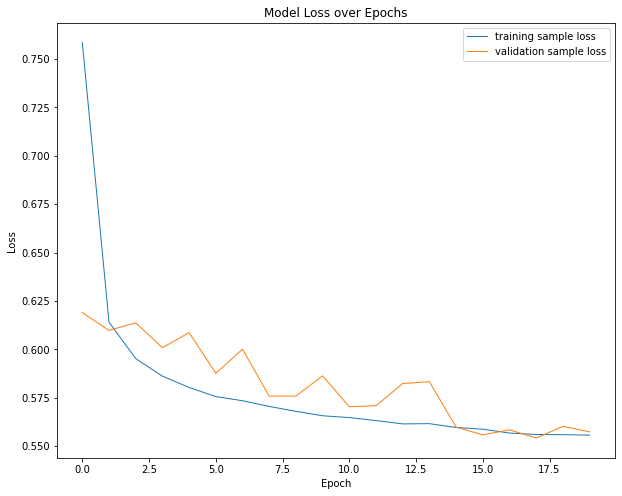

In [129]:
learningCurve(history)

In [130]:
labels = ['light', 'charm', 'bottom']


In [131]:
model.save('dnnVertex.h5')

In [132]:
labels_pred = model.predict(X_test)

In [133]:
labels_pred

array([[0.62574923, 0.12595107, 0.2482997 ],
       [0.05625959, 0.16101696, 0.7827234 ],
       [0.4683141 , 0.14823899, 0.38344687],
       ...,
       [0.7238511 , 0.10542176, 0.17072715],
       [0.50767046, 0.14381342, 0.34851605],
       [0.00536092, 0.04887756, 0.94576144]], dtype=float32)

In [134]:
len(features)

458720

In [135]:
len(X_test)

91744

In [95]:
y_test = df.values[:,16:19]

In [96]:
len(y_test)

1421134

In [136]:
def makeRoc(features_val, labels_val, labels, model, outputDir='', outputSuffix=''):
    from sklearn.metrics import roc_curve, auc
    df = pd.DataFrame()
    fpr = {}
    tpr = {}
    auc1 = {}
    plt.figure(figsize=(16,8))       
    for i, label in enumerate(labels):
        df[label] = labels_val[:,i]
        df[label + '_pred'] = labels_pred[:,i]
        fpr[label], tpr[label], threshold = roc_curve(df[label],df[label+'_pred'])
        auc1[label] = auc(fpr[label], tpr[label])
        plt.plot(fpr[label],tpr[label],label='%s tagger, AUC = %.1f%%'%(label.replace('j_',''),auc1[label]*100.))
    plt.plot([0, 1], [0, 1], lw=1, color='black', linestyle='--')
    #plt.semilogy()
    plt.xlabel("Background Efficiency")
    plt.ylabel("Signal Efficiency")
    plt.xlim([-0.05, 1.05])
    plt.ylim(0.001,1.05)
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.figtext(0.25, 0.90,'Feed Forward Roc Curve',fontweight='bold', wrap=True, horizontalalignment='right', fontsize=14)
    #plt.figtext(0.35, 0.90,'preliminary', style='italic', wrap=True, horizontalalignment='center', fontsize=14) 
    #plt.savefig('%sROC_%s.pdf'%(outputDir, outputSuffix))
    return labels_pred

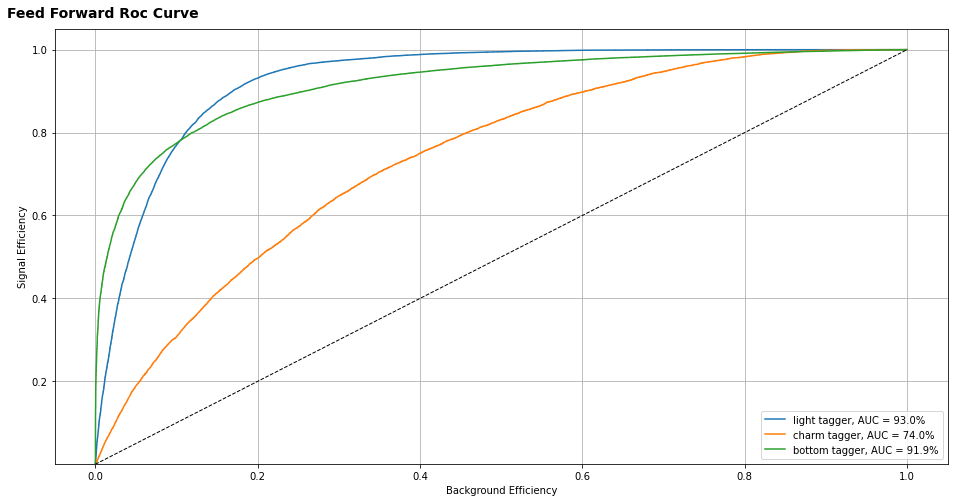

In [137]:
y_pred = makeRoc(X_test, y_test, labels, model, outputSuffix='two-layer')

In [78]:
y_pred = makeRoc(X_test, y_test, labels, model, outputSuffix='two-layer')

NameError: name 'labels_pred' is not defined

<Figure size 1152x576 with 0 Axes>

In [80]:
y_test

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [159]:
X_train, X_test, y_train, y_test = train_test_split(features,lab,test_size = 0.2, random_state = 42)


TypeError: only size-1 arrays can be converted to Python scalars

In [42]:
Inputs = Input(shape=(15,7))
x = LSTM(15, dropout = 0.5, kernel_initializer = 'VarianceScaling', kernel_regularizer = regularizers.l1_l2(l1= 9.999E-5, l2 = 0.0), name = 'lstm1')(Inputs)
x = Flatten(trainable= True)(x)
predictions = Dense(3, activation='softmax', kernel_initializer='lecun_uniform', name = 'output_sigmoid')(x)
model = Model(inputs=Inputs, outputs=predictions)
model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 15, 7)]           0         
_________________________________________________________________
lstm1 (LSTM)                 (None, 15)                1380      
_________________________________________________________________
flatten_1 (Flatten)          (None, 15)                0         
_________________________________________________________________
output_sigmoid (Dense)       (None, 3)                 48        
Total params: 1,428
Trainable params: 1,428
Non-trainable params: 0
_________________________________________________________________


In [43]:

adam = Adam(lr = 0.0001)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
history = model.fit(X_train, y_train, batch_size = 1024, epochs = 25, 
                    validation_split = 0.25, shuffle = True, callbacks = None,
                    use_multiprocessing=True, workers=4)

Epoch 1/25
269/269 [==============================] - 18s 68ms/step - loss: 0.7930 - accuracy: 0.6705 - val_loss: 0.6289 - val_accuracy: 0.7660
Epoch 2/25
269/269 [==============================] - 14s 50ms/step - loss: 0.6582 - accuracy: 0.7455 - val_loss: 0.6137 - val_accuracy: 0.7683
Epoch 3/25
269/269 [==============================] - 12s 46ms/step - loss: 0.6384 - accuracy: 0.7555 - val_loss: 0.6233 - val_accuracy: 0.7603
Epoch 4/25
269/269 [==============================] - 13s 47ms/step - loss: 0.6297 - accuracy: 0.7588 - val_loss: 0.6331 - val_accuracy: 0.7528
Epoch 5/25
269/269 [==============================] - 11s 43ms/step - loss: 0.6236 - accuracy: 0.7615 - val_loss: 0.6302 - val_accuracy: 0.7540
Epoch 6/25
269/269 [==============================] - 12s 44ms/step - loss: 0.6200 - accuracy: 0.7629 - val_loss: 0.6272 - val_accuracy: 0.7555
Epoch 7/25
269/269 [==============================] - 12s 43ms/step - loss: 0.6163 - accuracy: 0.7649 - val_loss: 0.6413 - val_accuracy:

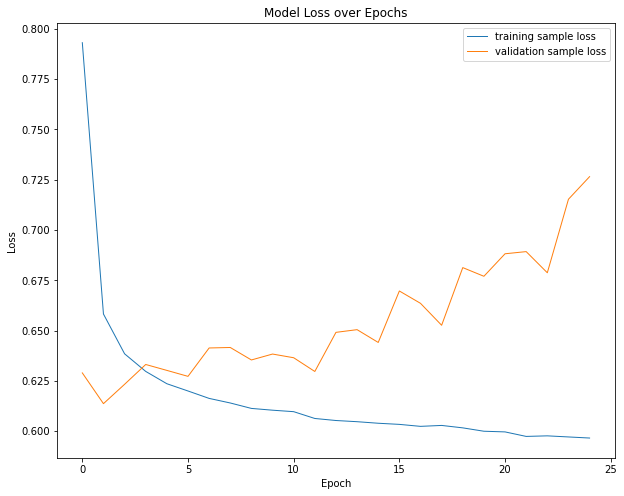

In [48]:
learningCurve(history)

In [49]:
imagetest = X_test.reshape(len(X_test), 16, 1)

ValueError: cannot reshape array of size 9633120 into shape (91744,16,1)

In [50]:
labels = ['light', 'charm', 'bottom']


In [51]:
lab

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [30]:
def makeRoc(features_val, labels_val, labels, model, outputDir='', outputSuffix=''):
    from sklearn.metrics import roc_curve, auc
    labels_pred = model.predict(features_val)
    df = pd.DataFrame()
    fpr = {}
    tpr = {}
    auc1 = {}
    plt.figure(figsize=(10,8))       
    for i, label in enumerate(labels):
        df[label] = labels_val[:,i]
        df[label + '_pred'] = labels_pred[:,i]
        fpr[label], tpr[label], threshold = roc_curve(df[label],df[label+'_pred'])
        auc1[label] = auc(fpr[label], tpr[label])
        plt.plot(fpr[label],tpr[label],label='%s tagger, AUC = %.1f%%'%(label.replace('j_',''),auc1[label]*100.))
    plt.plot([0, 1], [0, 1], lw=1, color='black', linestyle='--')
    #plt.semilogy()
    plt.xlabel("Background Efficiency")
    plt.ylabel("Signal Efficiency")
    plt.xlim([-0.05, 1.05])
    plt.ylim(0.001,1.05)
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.figtext(0.25, 0.90,'LSTM ROC Curve',fontweight='bold', wrap=True, horizontalalignment='right', fontsize=14)
    #plt.figtext(0.35, 0.90,'preliminary', style='italic', wrap=True, horizontalalignment='center', fontsize=14) 
    #plt.savefig('%sROC_%s.pdf'%(outputDir, outputSuffix))
    return labels_pred

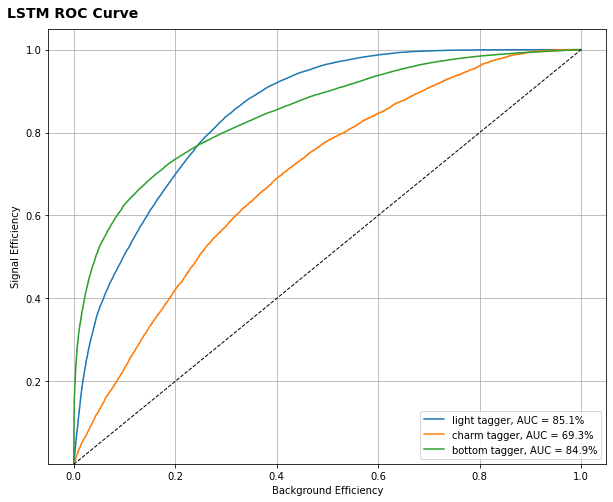

In [53]:
y_pred = makeRoc(X_test, y_test, labels, model, outputSuffix='two-layer')

In [54]:
model.save('lstmvertex.h5')

In [52]:
model.save_weights('lstm_weights')

In [74]:
model = tf.keras.models.load_model('lstm.h5')


In [58]:

l1Reg =  0.0001
l1RegR = 0.001

Inputs = Input(shape = (15,7))

x = GRU(16,kernel_regularizer=l1(l1Reg),recurrent_regularizer=l1(l1RegR),activation='relu', recurrent_activation='sigmoid', name='gru_selu',)(Inputs)
x = Dense(20,kernel_regularizer=l1(l1Reg),activation='relu', kernel_initializer='lecun_uniform', name='dense_relu')(x)
x = Dropout(0.1)(x)
predictions = Dense(3, activation='softmax', kernel_initializer='lecun_uniform', name='rnn_densef')(x)
model = Model(inputs=Inputs, outputs=predictions)

model.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 15, 7)]           0         
_________________________________________________________________
gru_selu (GRU)               (None, 16)                1200      
_________________________________________________________________
dense_relu (Dense)           (None, 20)                340       
_________________________________________________________________
dropout_31 (Dropout)         (None, 20)                0         
_________________________________________________________________
rnn_densef (Dense)           (None, 3)                 63        
Total params: 1,603
Trainable params: 1,603
Non-trainable params: 0
_________________________________________________________________


In [59]:
adam = Adam(lr = 0.0001)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:
history = model.fit(X_train, y_train, batch_size = 1024, epochs = 15, 
                    validation_split = 0.25, shuffle = True, callbacks = None,
                    use_multiprocessing=True, workers=4)

Epoch 1/15
269/269 [==============================] - 13s 48ms/step - loss: 0.7072 - accuracy: 0.7530 - val_loss: 0.6345 - val_accuracy: 0.7809
Epoch 2/15
269/269 [==============================] - 15s 57ms/step - loss: 0.6325 - accuracy: 0.7819 - val_loss: 0.6159 - val_accuracy: 0.7843
Epoch 3/15
269/269 [==============================] - 15s 56ms/step - loss: 0.6179 - accuracy: 0.7849 - val_loss: 0.6058 - val_accuracy: 0.7868
Epoch 4/15
269/269 [==============================] - 14s 51ms/step - loss: 0.6086 - accuracy: 0.7868 - val_loss: 0.5994 - val_accuracy: 0.7881
Epoch 5/15
269/269 [==============================] - 16s 59ms/step - loss: 0.6020 - accuracy: 0.7875 - val_loss: 0.5947 - val_accuracy: 0.7886
Epoch 6/15
269/269 [==============================] - 12s 43ms/step - loss: 0.5964 - accuracy: 0.7893 - val_loss: 0.5886 - val_accuracy: 0.7899
Epoch 7/15
269/269 [==============================] - 11s 42ms/step - loss: 0.5927 - accuracy: 0.7899 - val_loss: 0.5841 - val_accuracy:

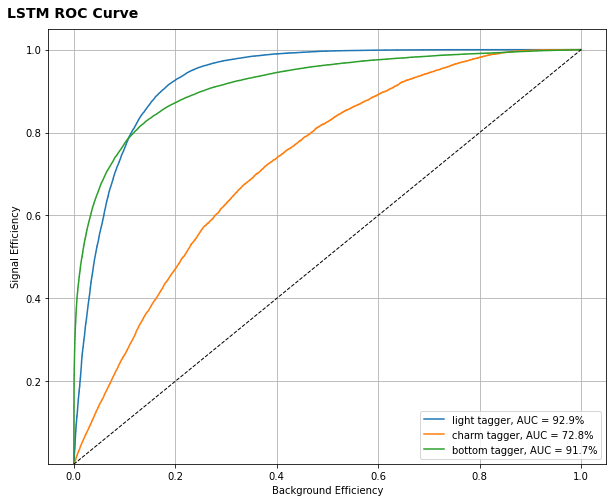

In [62]:
y_pred = makeRoc(X_test, y_test, labels, model, outputSuffix='two-layer')

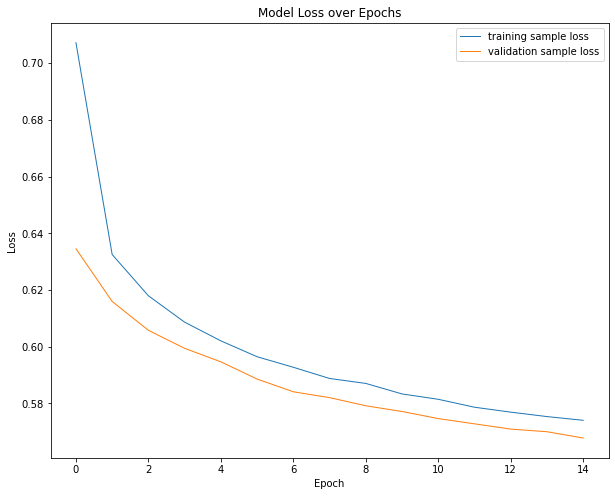

In [63]:
learningCurve(history)

In [181]:
model.save('GRUVertex.h5')

In [67]:
Inputs = Input(shape=(15,7))
x = LSTM(15, dropout = 0.5, kernel_initializer = 'VarianceScaling', kernel_regularizer = regularizers.l1_l2(l1= 9.999E-5, l2 = 0.0), name = 'lstm1')(Inputs)
x = Dense(64, activation='relu', kernel_initializer='lecun_uniform', name='fc4')(x)
x= Dropout(rate = 0.5)(x)
x = Dense(32, activation='relu', kernel_initializer='lecun_uniform', name='fc7')(x)
x= Dropout(rate = 0.5)(x)
x = Dense(16, activation='relu', kernel_initializer='lecun_uniform', name='fc8')(x)
predictions = Dense(3, activation='softmax', kernel_initializer='lecun_uniform', name = 'output_sigmoid')(x)
model = Model(inputs=Inputs, outputs=predictions)
model.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 15, 7)]           0         
_________________________________________________________________
lstm1 (LSTM)                 (None, 15)                1380      
_________________________________________________________________
fc4 (Dense)                  (None, 64)                1024      
_________________________________________________________________
dropout_34 (Dropout)         (None, 64)                0         
_________________________________________________________________
fc7 (Dense)                  (None, 32)                2080      
_________________________________________________________________
dropout_35 (Dropout)         (None, 32)                0         
_________________________________________________________________
fc8 (Dense)                  (None, 16)                528

In [73]:
adam = Adam(lr = 0.0001)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [74]:
history = model.fit(X_train, y_train, batch_size = 1024, epochs = 25, 
                    validation_split = 0.25, shuffle = True, callbacks = None,
                    use_multiprocessing=True, workers=4)

Epoch 1/25
269/269 [==============================] - 15s 58ms/step - loss: 0.6322 - accuracy: 0.7599 - val_loss: 0.6419 - val_accuracy: 0.7503
Epoch 2/25
269/269 [==============================] - 13s 49ms/step - loss: 0.6270 - accuracy: 0.7615 - val_loss: 0.6599 - val_accuracy: 0.7389
Epoch 3/25
269/269 [==============================] - 15s 56ms/step - loss: 0.6207 - accuracy: 0.7642 - val_loss: 0.6574 - val_accuracy: 0.7378
Epoch 4/25
269/269 [==============================] - 16s 58ms/step - loss: 0.6174 - accuracy: 0.7655 - val_loss: 0.6627 - val_accuracy: 0.7324
Epoch 5/25
269/269 [==============================] - 15s 55ms/step - loss: 0.6157 - accuracy: 0.7658 - val_loss: 0.6573 - val_accuracy: 0.7351
Epoch 6/25
269/269 [==============================] - 15s 54ms/step - loss: 0.6130 - accuracy: 0.7665 - val_loss: 0.6614 - val_accuracy: 0.7333
Epoch 7/25
269/269 [==============================] - 13s 48ms/step - loss: 0.6106 - accuracy: 0.7679 - val_loss: 0.6635 - val_accuracy:

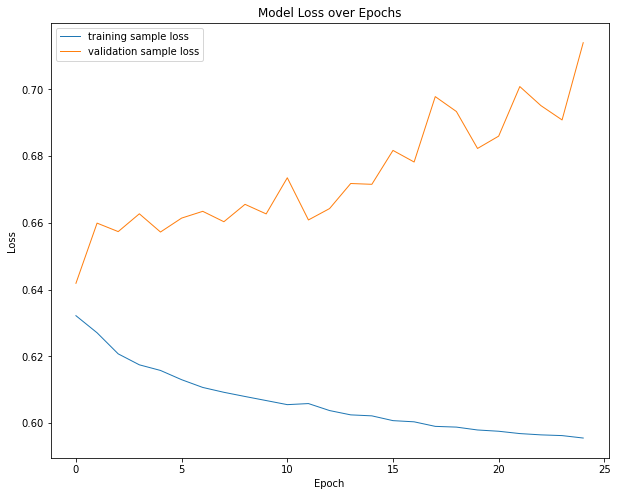

In [75]:
learningCurve(history)

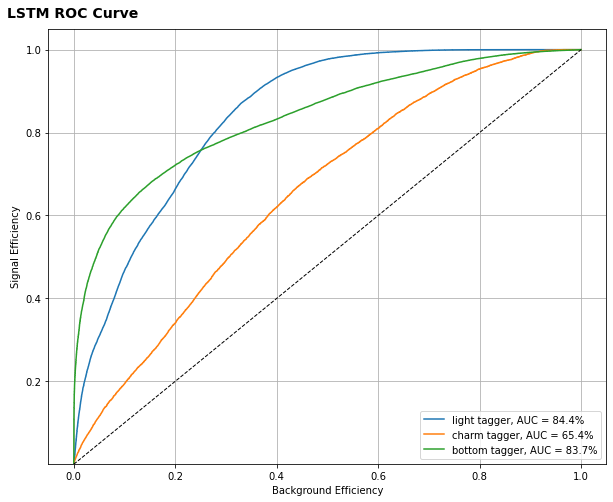

In [76]:
y_pred = makeRoc(X_test, y_test, labels, model, outputSuffix='two-layer')

In [ ]:
model.save('LSTMDNNVERTEX.h5')

In [201]:
import external_RNN_code.py

ModuleNotFoundError: No module named 'external_RNN_code.py'; 'external_RNN_code' is not a package

In [18]:
def Pair_inputs(data, num_tracks_for_pairing = 15):
    """
        assuming data shape is: (batch, num_tracks, 13)
    
        returns:
        ---------
        (batch , num_tracks_for_pairing**2, 26)
    """

    # Example: input of shape (batch, 10 (const. #tracks), 13)
    # --> 100 pairs including (a,b), (b,a)
    # stacking the pairs' features together --> 2*13 features
    # will be re-permuted & duplicated into (batch, 100, 26)
    # [optional] transpose / reshape --> (batch * 100, 26)

    sp = data.shape
    
    num_feat = sp[2]
    assert data.ndim==3

    result = np.zeros((sp[0], num_tracks_for_pairing**2, num_feat*2),'float32')

    for i in range(num_tracks_for_pairing):
        result[:, i::num_tracks_for_pairing, :num_feat] = data
        result[:, i*num_tracks_for_pairing:num_tracks_for_pairing + i*num_tracks_for_pairing, num_feat:] = data

    return result






def build_External_RNN(special_layer_hidden_units=20, 
                                 num_tracks_for_pairing = 15, 
                                 hidden_layers = [300, 300], 
                                 dropout_rates = [0.2, 0.2],
                                 num_classes = 2, 
                                 num_input_features = 13, 
                                 weight_decay_rate = None):
    '''
     Example: original features have input shape (batch, 15 (const. #tracks), 13)
     --> 225 pairs including (a,b), (b,a), -- (we could remove those double-counts)
     stacking the pair's features together --> 2*13 features
     --> model expects input of shape: (batch, 225, 26)
         
     Apply FC-layer with <num_units> neurons (don't choose too many as everything will be big) along the time axis 
     [note that flatten_input=False takes care of this in my DNN code, but keras might need somthine like TimeDistributed()].
     
     Then put standard MLP on it
    '''

    input_mid = layers.Input(shape=(None, num_tracks_for_pairing**2, 2 * num_input_features))

    #(batch , 100, 26)
    L = layers.Layer_Dense(input_mid, special_layer_hidden_units, flatten_input=False, activation_function='ReLu')
    #(batch , 100, special_layer_hidden_units)

    for i, nh in enumerate(hidden_layers):
        L = layers.Layer_Dropout(L, dropout_rate=dropout_rates[i])
        L = layers.Layer_Dense(L, nh, flatten_input=True, activation_function='ReLu')

    last = layers.Layer_Dense(L, num_classes, activation_function='linear')

    lay = layers.Layer_Output(last)
    
    dnn = GNET.model()
    dnn.add(lay)
    dnn.InitializeModel(weight_decay_rate = weight_decay_rate)
    return dnn



In [15]:
GNET.model

NameError: name 'GNET' is not defined

In [19]:
pair = Pair_inputs(features)

In [138]:
pair

array([[[-0.215808  , -0.116363  , -0.00300674, ..., -0.00300674,
          0.0152614 , -0.0627263 ],
        [-0.215808  , -0.116363  , -0.00300674, ...,  0.0685767 ,
         -0.0537915 ,  0.137368  ],
        [-0.215808  , -0.116363  , -0.00300674, ...,  0.101485  ,
         -0.156864  , -0.436077  ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.865832  , -0.0154666 , -0.0470188 , ..., -0.0470188 ,
          0.00440316, -0.236619  ],
        [ 0.865832  , -0.0154666 , -0.0470188 , ..., -0.0163517 ,
         -0.0178328 ,  0.436609  ],
        [ 0.865832  , -0.0154666 , -0.0470188 , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  

In [21]:
X_train, X_test, y_train, y_test = train_test_split(pair,lab,test_size = 0.2, random_state = 42)


In [25]:
adam = Adam(lr = 0.0001)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
Inputs = Input(shape=(225,10))
x = Dense(64, activation='relu', kernel_initializer='lecun_uniform', name='fc4')(Inputs)
x= Dropout(rate = 0.5)(x)
x = Dense(32, activation='relu', kernel_initializer='lecun_uniform', name='fc7')(x)
x= Dropout(rate = 0.5)(x)
x = Dense(16, activation='relu', kernel_initializer='lecun_uniform', name='fc8')(x)
x = Dropout(rate = 0.5)(x)
x = Dense(8, activation='relu', kernel_initializer='lecun_uniform', name='fc9')(x)
x = Flatten()(x)
predictions = Dense(3, activation='softmax', kernel_initializer='lecun_uniform', name = 'output_sigmoid')(x)
model = Model(inputs=Inputs, outputs=predictions)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 225, 10)]         0         
_________________________________________________________________
fc4 (Dense)                  (None, 225, 64)           704       
_________________________________________________________________
dropout (Dropout)            (None, 225, 64)           0         
_________________________________________________________________
fc7 (Dense)                  (None, 225, 32)           2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 225, 32)           0         
_________________________________________________________________
fc8 (Dense)                  (None, 225, 16)           528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 225, 16)           0     

In [26]:
history = model.fit(X_train, y_train, batch_size = 1024, epochs = 25, 
                    validation_split = 0.25, shuffle = True, callbacks = None,
                    use_multiprocessing=True, workers=4)

Epoch 1/25
269/269 [==============================] - 81s 300ms/step - loss: 0.8703 - accuracy: 0.6040 - val_loss: 0.7896 - val_accuracy: 0.6553
Epoch 2/25
269/269 [==============================] - 82s 306ms/step - loss: 0.6433 - accuracy: 0.7538 - val_loss: 0.8791 - val_accuracy: 0.6928
Epoch 3/25
269/269 [==============================] - 79s 294ms/step - loss: 0.5739 - accuracy: 0.7833 - val_loss: 0.8793 - val_accuracy: 0.6991
Epoch 4/25
269/269 [==============================] - 77s 288ms/step - loss: 0.5558 - accuracy: 0.7894 - val_loss: 0.8531 - val_accuracy: 0.7074
Epoch 5/25
269/269 [==============================] - 78s 291ms/step - loss: 0.5453 - accuracy: 0.7935 - val_loss: 0.7707 - val_accuracy: 0.7270
Epoch 6/25
269/269 [==============================] - 77s 286ms/step - loss: 0.5382 - accuracy: 0.7956 - val_loss: 0.7185 - val_accuracy: 0.7430
Epoch 7/25
269/269 [==============================] - 83s 309ms/step - loss: 0.5324 - accuracy: 0.7974 - val_loss: 0.7629 - val_ac

In [74]:
y_pred = makeRoc(X_test, y_test, labels, model, outputSuffix='two-layer')

NameError: name 'labels_pred' is not defined

<Figure size 1152x576 with 0 Axes>

In [33]:
labels = ['light', 'charm', 'bottom']


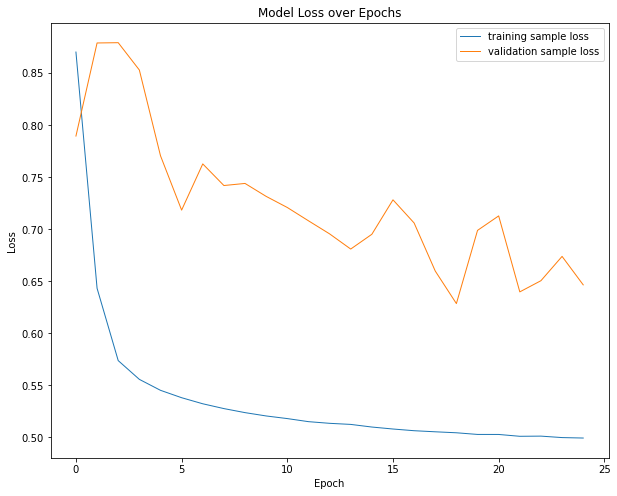

In [34]:
learningCurve(history)